In [4]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score,davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram
import numpy as np 
import matplotlib.pyplot as plt

In [5]:
# data frame  importation de nos donnees
iris = load_iris()
x = iris.data[:, ]
y = iris[ 'target']

In [7]:
#seraparation du jeu d'entrainement
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [8]:
#normalisation des donnes 
scaler = StandardScaler().fit(x_train)
x_train_norm = scaler.transform(x_train)

In [18]:
#determination du nombre de class
k_range = np.arange (2,10)
db_score = np.zeros (k_range.shape)
for k in k_range:
        agglo = AgglomerativeClustering(k)
        pred = agglo.fit_predict(x_train_norm)
        db_score[k-2] = silhouette_score(x_train_norm,pred)

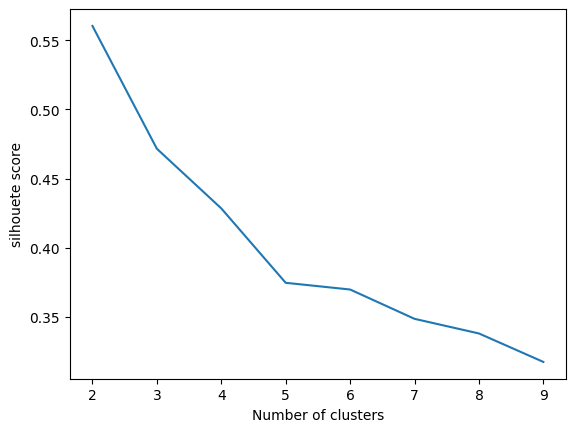

In [19]:
plt.plot(k_range,db_score)
plt.xlabel("Number of clusters")
plt.ylabel("silhouete score")
plt.show()

In [21]:
#initialisation 
agglo = AgglomerativeClustering(3)

In [22]:
#prediction en train set
pred = agglo.fit_predict(x_train_norm)

In [24]:
#silhouette score for the training set 

print (silhouette_score(x_train_norm,pred))

0.4715766410756801


<function matplotlib.pyplot.show(close=None, block=None)>

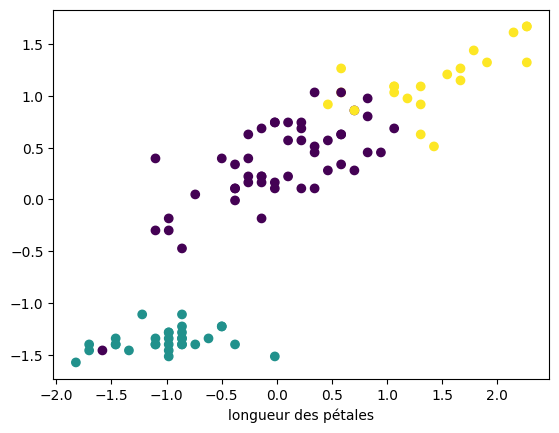

In [25]:
#visualisation des classes sur les variable longeur sepam et pétame
plt.scatter(x_train_norm[:,0],x_train_norm[:,2],c=pred)
plt.xlabel('longueur des sépales')
plt.xlabel('longueur des pétales')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

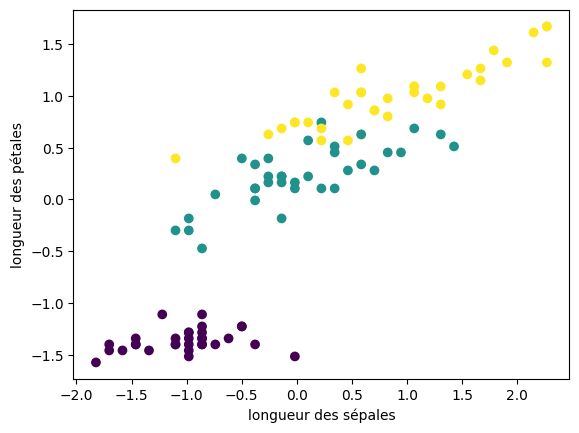

In [27]:
plt.scatter(x_train_norm[:,0],x_train_norm[:,2],c=y_train)
plt.xlabel('longueur des sépales')
plt.ylabel('longueur des pétales')
plt.show